In [1]:
# 1：ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import svm, metrics, preprocessing #機械学習用のライブラリを利用
import sklearn.model_selection as cross_validation
from mlxtend.plotting import plot_decision_regions #学習結果をプロットする外部ライブラリを利用

In [14]:
# 2：Wineのデータセットを読み込む--------------------------------
df_wine_all=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
#品種(0列、1～3)と色（10列）とプロリンの量(13列)を使用する
df_wine=df_wine_all[[0, 10, 13]]
df_wine.columns = ['class', 'color', 'proline']
pd.DataFrame(df_wine)

,class,color,proline
0,1,5.64,1065
1,1,4.38,1050
2,1,5.68,1185
3,1,7.80,1480
4,1,4.32,735
...,...,...,...
173,3,7.70,740
174,3,7.30,750
175,3,10.20,835
176,3,9.30,840


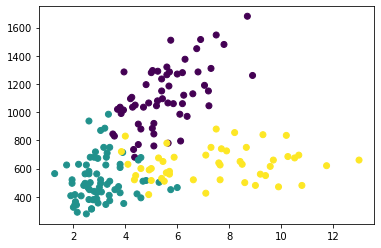

In [25]:
# 3：プロットしてみる------------------------------------------------------
%matplotlib inline

x=df_wine["color"]
y=df_wine["proline"]
z=df_wine["class"]-1
plt.scatter(x, y, c=z)
plt.show()

In [42]:
# 4：データの整形-------------------------------------------------------
X=df_wine[["color", "proline"]]
sc=preprocessing.StandardScaler()
sc.fit(X)
X_std=sc.transform(X)

In [62]:
#解説 5：機械学習で分類する---------------------------------------------------
# 損失の大きさをどれくらい考慮するかを決めるパラメータCは1.0とします。
# またクラスごとのデータ数の違いを補正します（weight=’balanced’）。
clf_result=svm.LinearSVC(loss="hinge", C=1.0, class_weight='balanced', random_state=0)
clf_result.fit(X_std, z)

LinearSVC(class_weight='balanced', loss='hinge', random_state=0)

In [44]:
# 6：K分割交差検証（cross validation）で性能を評価する---------------------
scores=cross_validation.cross_val_score(clf_result, X_std, z, cv=10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())

平均正解率 =  0.888562091503268
正解率の標準偏差 =  0.08938311756803621


正答率 =  0.8944099378881988


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


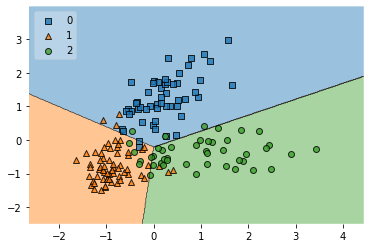

In [56]:
# 7：トレーニングデータとテストデータに分けて実行してみる------------------
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_std, z, train_size=0.1, random_state=0)
clf_result.fit(X_train, y_train)
# clf_result.score(X_test, y_test)
pre=clf_result.predict(X_test)
ac_score=metrics.accuracy_score(y_test, pre)
print("正答率 = ",ac_score)

X_train_plot=np.vstack(X_train)
train_label_plot=np.hstack(y_train)
X_test_plot=np.vstack(X_test)
test_label_plot=np.hstack(y_test)
#plot_decision_regions(X_train_plot, train_label_plot, clf=clf_result, res=0.01) #学習データをプロット
plot_decision_regions(X_test_plot, test_label_plot, clf=clf_result, res=0.01, legend=2) #テストデータをプロット

In [57]:
# 8：任意のデータに対する識別結果を見てみる------------------
# predicted_label=clf_result.predict([1,-1])
# print("このテストデータのラベル = ", predicted_label)

ValueError: ignored

In [60]:
# 9：識別平面の式を手に入れる--------------------------------
print(clf_result.intercept_)
print(clf_result.coef_ )  #coef[0]*x+coef[1]*y+intercept=0

[-0.31669143 -0.76190476 -0.82094777]
[[-0.13134873  1.51637723]
 [-1.41224958 -0.62199348]
 [ 1.0037256  -0.87719943]]
